<module 'matplotlib.pyplot' from 'C:\\Users\\sergi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

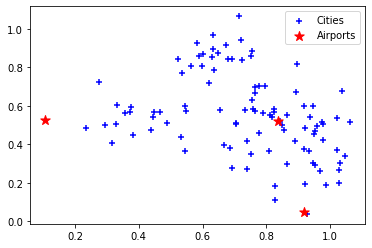

In [38]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [39]:
airports - .1 * np.array([(1, 1), (2, 3), (4, 2)])

array([[ 0.73538545,  0.42346994],
       [ 0.71896059, -0.25296112],
       [-0.29246805,  0.32406592]])

In [40]:
cities_to_list = np.array(list(cities))

In [41]:
airports = np.array(airports)

In [42]:
distance = (cities_to_list[0] - airports[0]).T.dot(cities_to_list[0] - airports[0])

In [43]:
distance

0.351079429306894

In [44]:
def find_closest_airports(cities, aiports):
    idx = np.array([0 for _ in range(len(cities))])
    for i in range(len(cities)):
        city_i = cities[i]
        min_distance = float('inf')
        for k in range(len(airports)):
            kth_airport = airports[k]
            distance = (city_i - kth_airport).T.dot(city_i - kth_airport)
            if distance < min_distance:
                min_distance = distance
                idx[i] = k
    return idx

In [45]:
idx = find_closest_airports(cities_to_list, airports)

In [46]:
elements = cities_to_list[idx == 2]

In [47]:
len(cities_to_list[idx == 2])

14

In [48]:
def objective_score(cities, airports):
    score = 0
    idx = find_closest_airports(cities, airports)
    for i in range(len(airports)):
        elements = cities[idx == i]
        for element in elements:
            score += (element - airports[i]).T.dot(element - airports[i])
    return score

In [49]:
objective_score(cities_to_list, airports)

6.729598135954657

In [50]:
def gradient(cities, airports):
    idx = find_closest_airports(cities, airports)
    gradient_of_f = [0 for _ in range(len(airports))]
    for i in range(len(airports)):
        gradient_xi = 0
        gradient_yi = 0
        elements = cities[idx == i]
        gradient_xi = 2 * (np.sum(airports[i][0] - elements[:, 0]))
        gradient_yi = 2 * (np.sum(airports[i][1] - elements[:, 1]))
        gradient_of_f[i] = (gradient_xi, gradient_yi)
    return np.array(gradient_of_f)

In [51]:
gradient(cities_to_list, airports)

array([[  9.5273455 , -12.30639612],
       [ -0.60280295,  -3.11889809],
       [ -7.12823726,  -0.43428968]])

In [52]:
def gradient_descent(cities, airports, epochs = 500, learning_rate = .01):
    objective_scores = []
    airport_locations = []
    for _ in range(epochs):
        objective_scores.append(objective_score(cities, airports))
        grad = gradient(cities, airports)
        airports = airports - learning_rate * grad
        airport_locations.append(airports)
    return objective_scores, airport_locations

In [53]:
objective_scores, airport_locations = gradient_descent(cities_to_list, airports)

In [54]:
objective_scores

[6.729598135954657,
 5.618854375192547,
 5.176169306019588,
 4.978596560756035,
 4.882192449921285,
 4.832171866270713,
 4.805159125729593,
 4.790178338847845,
 4.781709748888795,
 4.776849172149461,
 4.774022723152403,
 4.772359664502549,
 4.771370513529093,
 4.770776332643843,
 4.77041617995227,
 4.770196105890672,
 4.77006065991578,
 4.7699767739950705,
 4.769924538107342,
 4.769891859346699,
 4.769871334872501,
 4.769858401346884,
 4.769850228677908,
 4.769845052491329,
 4.769841767892149,
 4.769839680346929,
 4.769838351885714,
 4.769837505593645,
 4.769836966000462,
 4.769836621715115,
 4.769836401919032,
 4.769836261532873,
 4.769836171832605,
 4.769836114500576,
 4.769836077847546,
 4.769836054410072,
 4.769836039420698,
 4.769836029832994,
 4.769836023699713,
 4.769836019775897,
 4.769836017265417,
 4.769836015659106,
 4.769836014631277,
 4.769836013973568,
 4.769836013552694,
 4.769836013283362,
 4.769836013111003,
 4.7698360130007025,
 4.769836012930114,
 4.769836012884936,


<module 'matplotlib.pyplot' from 'C:\\Users\\sergi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

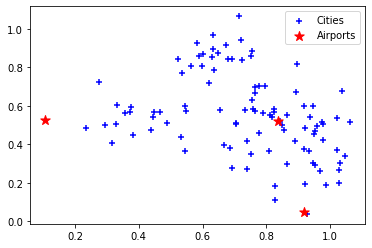